GTSRB dataset not found. Generating synthetic dataset.
Synthetic dataset: 1500 images, 5 classes.


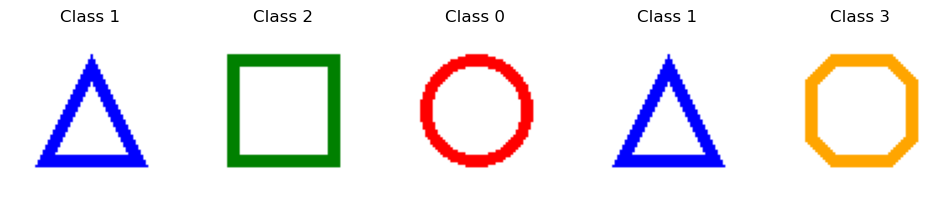

C:\Users\New User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9552 - loss: 0.2993 - val_accuracy: 0.8167 - val_loss: 0.6312
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9990 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.3533
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 1.0000 - loss: 3.3444e-04 - val_accuracy: 1.0000 - val_loss: 0.2013
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9990 - loss: 0.0014 - val_accuracy: 0.8167 - val_loss: 0.1927
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9990 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0766
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 1.0000 - loss: 4.8063e-05 - val_accuracy: 1.0000 - val_loss: 0.0169
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 1.0000 - loss: 1.5077e-04 - val_

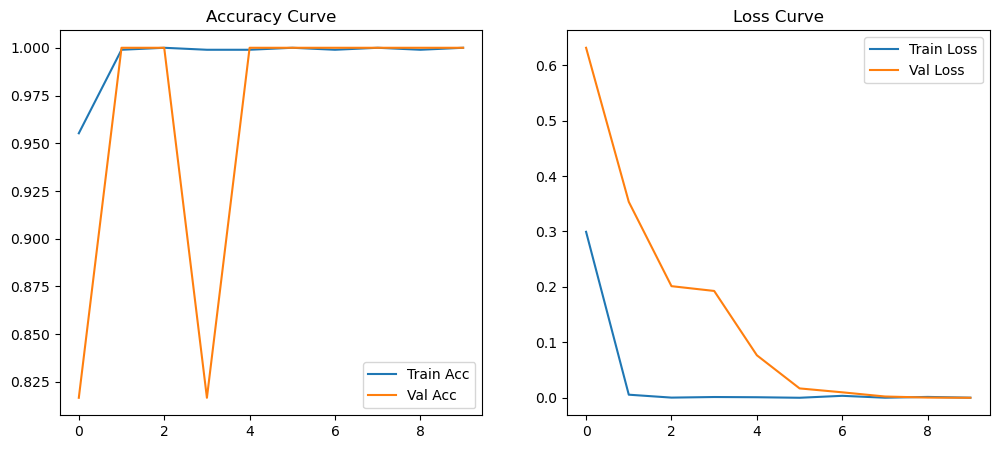

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 
CNN Accuracy: 1.0000


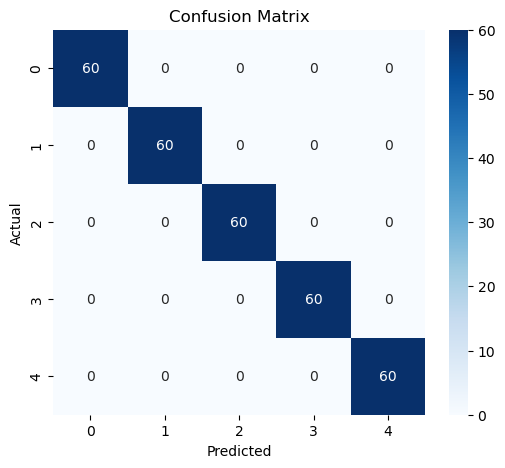

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [4]:
# Traffic Sign Recognition using CNN (GTSRB Dataset)
# --------------------------------------------------
# Author: Abayomi Modupe
# Description:
# This notebook builds and trains a CNN model to classify traffic signs using the GTSRB dataset.
# It includes preprocessing, visualization, model training, and evaluation.

# ===============================
# 1. Import Libraries
# ===============================
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from PIL import Image, ImageDraw

# TensorFlow for CNN (if available)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
    from tensorflow.keras.utils import to_categorical
    TF_AVAILABLE = True
except ImportError:
    TF_AVAILABLE = False
    print("TensorFlow not available. Fallback to sklearn MLP.")

# ===============================
# 2. Dataset Loading (GTSRB or Synthetic Fallback)
# ===============================
from typing import Tuple

def load_gtsrb_dataset(base_path: str = './data/GTSRB/train', image_size: Tuple[int, int] = (64, 64)):
    images, labels = [], []
    if not os.path.exists(base_path):
        print("GTSRB dataset not found. Generating synthetic dataset.")
        return None, None

    for label in sorted(os.listdir(base_path)):
        class_dir = os.path.join(base_path, label)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = Image.open(img_path).convert('RGB').resize(image_size)
                images.append(np.array(img))
                labels.append(int(label))
            except Exception:
                continue
    return np.array(images), np.array(labels)

def generate_synthetic_data(num_classes=5, samples_per_class=300, image_size=(64, 64)):
    images, labels = [], []
    shapes = ['circle', 'triangle', 'square', 'octagon', 'diamond'][:num_classes]
    for class_id, shape in enumerate(shapes):
        for _ in range(samples_per_class):
            img = Image.new('RGB', image_size, 'white')
            draw = ImageDraw.Draw(img)
            if shape == 'circle':
                draw.ellipse([10, 10, 54, 54], outline='red', width=5)
            elif shape == 'triangle':
                draw.polygon([(32, 10), (10, 54), (54, 54)], outline='blue', width=5)
            elif shape == 'square':
                draw.rectangle([10, 10, 54, 54], outline='green', width=5)
            elif shape == 'octagon':
                draw.polygon([(20,10),(44,10),(54,20),(54,44),(44,54),(20,54),(10,44),(10,20)], outline='orange', width=5)
            elif shape == 'diamond':
                draw.polygon([(32,10),(54,32),(32,54),(10,32)], outline='purple', width=5)
            images.append(np.array(img))
            labels.append(class_id)
    print(f"Synthetic dataset: {len(images)} images, {num_classes} classes.")
    return np.array(images), np.array(labels)

# ===============================
# 3. Preprocessing
# ===============================
IMAGE_SIZE = (64, 64)
images, labels = load_gtsrb_dataset()

if images is None:
    images, labels = generate_synthetic_data()

images = images.astype('float32') / 255.0
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

num_classes = len(np.unique(labels))

# Visualize samples
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Class {y_train[i]}")
    ax.axis('off')
plt.show()

# ===============================
# 4. Model Definition
# ===============================
def build_cnn(input_shape=(64,64,3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ===============================
# 5. Model Training & Evaluation
# ===============================
if TF_AVAILABLE:
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat = to_categorical(y_test, num_classes)

    model = build_cnn((64,64,3), num_classes)
    history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

    preds = np.argmax(model.predict(X_test), axis=1)
    acc = np.mean(preds == y_test)
    print(f"CNN Accuracy: {acc:.4f}")
else:
    X_train_flat = X_train.reshape(len(X_train), -1)
    X_test_flat = X_test.reshape(len(X_test), -1)

    mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, random_state=42)
    mlp.fit(X_train_flat, y_train)
    preds = mlp.predict(X_test_flat)
    acc = np.mean(preds == y_test)
    print(f"Fallback MLP Accuracy: {acc:.4f}")

# ===============================
# 6. Evaluation & Visualization
# ===============================
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:\n", classification_report(y_test, preds))


GTSRB dataset not found. Generating synthetic dataset.
Synthetic dataset: 1500 images, 5 classes.


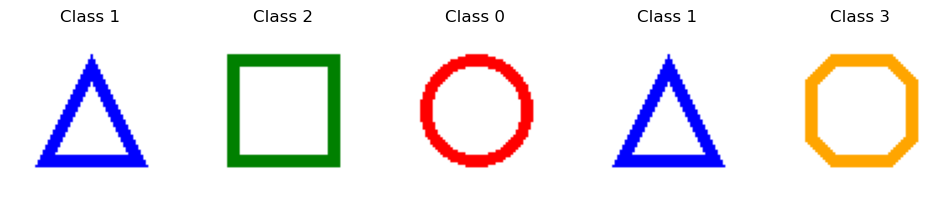


Training baseline CNN...
Epoch 1/10


C:\Users\New User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9594 - loss: 0.2543 - val_accuracy: 0.4208 - val_loss: 2.3217
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9990 - loss: 7.2557e-04 - val_accuracy: 0.4375 - val_loss: 1.6336
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 1.0000 - loss: 1.4032e-08 - val_accuracy: 0.4375 - val_loss: 1.0472
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9990 - loss: 0.0189 - val_accuracy: 0.8167 - val_loss: 0.1747
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 1.0000 - loss: 2.4835e-09 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 1.0000 - loss: 2.2546e-06 - val_accuracy: 1.0000 - val_loss: 3.9786e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 1.0000 - loss: 1.2430e-07 - val_accuracy: 1.0000 - val_loss: 3.2797e-06
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 1.0000 - loss: 4.0581e-

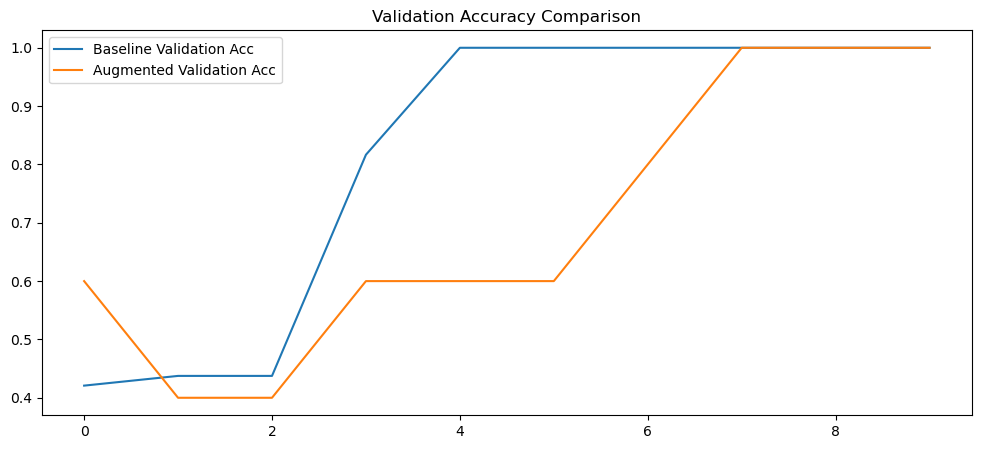

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
Baseline CNN Accuracy: 1.0000
Augmented CNN Accuracy: 1.0000


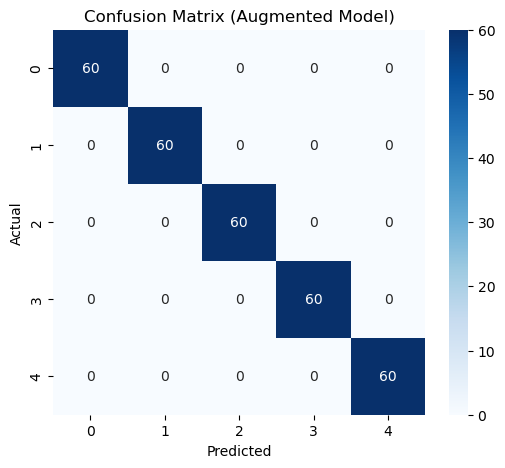

Classification Report (Augmented Model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [5]:
# Traffic Sign Recognition using CNN (GTSRB Dataset) with Data Augmentation
# --------------------------------------------------
# Author: Abayomi Modupe
# Description:
# This notebook builds and trains a CNN model to classify traffic signs using the GTSRB dataset.
# Includes preprocessing, visualization, model training, data augmentation, and performance comparison.

# ===============================
# 1. Import Libraries
# ===============================
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from PIL import Image, ImageDraw

try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.utils import to_categorical
    TF_AVAILABLE = True
except ImportError:
    TF_AVAILABLE = False
    print("TensorFlow not available. Fallback to sklearn MLP.")

# ===============================
# 2. Dataset Loading (GTSRB or Synthetic Fallback)
# ===============================
from typing import Tuple

def load_gtsrb_dataset(base_path: str = './data/GTSRB/train', image_size: Tuple[int, int] = (64, 64)):
    images, labels = [], []
    if not os.path.exists(base_path):
        print("GTSRB dataset not found. Generating synthetic dataset.")
        return None, None

    for label in sorted(os.listdir(base_path)):
        class_dir = os.path.join(base_path, label)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = Image.open(img_path).convert('RGB').resize(image_size)
                images.append(np.array(img))
                labels.append(int(label))
            except Exception:
                continue
    return np.array(images), np.array(labels)

def generate_synthetic_data(num_classes=5, samples_per_class=300, image_size=(64, 64)):
    images, labels = [], []
    shapes = ['circle', 'triangle', 'square', 'octagon', 'diamond'][:num_classes]
    for class_id, shape in enumerate(shapes):
        for _ in range(samples_per_class):
            img = Image.new('RGB', image_size, 'white')
            draw = ImageDraw.Draw(img)
            if shape == 'circle':
                draw.ellipse([10, 10, 54, 54], outline='red', width=5)
            elif shape == 'triangle':
                draw.polygon([(32, 10), (10, 54), (54, 54)], outline='blue', width=5)
            elif shape == 'square':
                draw.rectangle([10, 10, 54, 54], outline='green', width=5)
            elif shape == 'octagon':
                draw.polygon([(20,10),(44,10),(54,20),(54,44),(44,54),(20,54),(10,44),(10,20)], outline='orange', width=5)
            elif shape == 'diamond':
                draw.polygon([(32,10),(54,32),(32,54),(10,32)], outline='purple', width=5)
            images.append(np.array(img))
            labels.append(class_id)
    print(f"Synthetic dataset: {len(images)} images, {num_classes} classes.")
    return np.array(images), np.array(labels)

# ===============================
# 3. Preprocessing
# ===============================
IMAGE_SIZE = (64, 64)
images, labels = load_gtsrb_dataset()

if images is None:
    images, labels = generate_synthetic_data()

images = images.astype('float32') / 255.0
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

num_classes = len(np.unique(labels))

fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Class {y_train[i]}")
    ax.axis('off')
plt.show()

# ===============================
# 4. Model Definition
# ===============================
def build_cnn(input_shape=(64,64,3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ===============================
# 5. Model Training & Comparison (Baseline vs Augmented)
# ===============================
if TF_AVAILABLE:
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat = to_categorical(y_test, num_classes)

    # --- Baseline CNN ---
    print("\nTraining baseline CNN...")
    base_model = build_cnn((64,64,3), num_classes)
    history_base = base_model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    # --- Data Augmentation ---
    print("\nTraining CNN with Data Augmentation...")
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        fill_mode='nearest')

    aug_model = build_cnn((64,64,3), num_classes)
    history_aug = aug_model.fit(datagen.flow(X_train, y_train_cat, batch_size=32),
                                epochs=10, validation_data=(X_test, y_test_cat), verbose=1)

    # --- Compare Accuracy Curves ---
    plt.figure(figsize=(12,5))
    plt.plot(history_base.history['val_accuracy'], label='Baseline Validation Acc')
    plt.plot(history_aug.history['val_accuracy'], label='Augmented Validation Acc')
    plt.title('Validation Accuracy Comparison')
    plt.legend()
    plt.show()

    preds_base = np.argmax(base_model.predict(X_test), axis=1)
    preds_aug = np.argmax(aug_model.predict(X_test), axis=1)

    acc_base = np.mean(preds_base == y_test)
    acc_aug = np.mean(preds_aug == y_test)

    print(f"Baseline CNN Accuracy: {acc_base:.4f}")
    print(f"Augmented CNN Accuracy: {acc_aug:.4f}")
else:
    X_train_flat = X_train.reshape(len(X_train), -1)
    X_test_flat = X_test.reshape(len(X_test), -1)
    mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, random_state=42)
    mlp.fit(X_train_flat, y_train)
    preds_aug = mlp.predict(X_test_flat)
    acc_aug = np.mean(preds_aug == y_test)
    print(f"Fallback MLP Accuracy: {acc_aug:.4f}")

# ===============================
# 6. Evaluation & Visualization
# ===============================
cm = confusion_matrix(y_test, preds_aug)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Augmented Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report (Augmented Model):\n", classification_report(y_test, preds_aug))
